In [127]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from sklearn.datasets import load_files
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from keras.preprocessing import image                  
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [107]:
# Define the list of data paths
data_paths = [
    r"C:\Users\yashu\smart_driver_guard\app\data\training\closed_eye",
    r"C:\Users\yashu\smart_driver_guard\app\data\training\open_eye",
    r"C:\Users\yashu\smart_driver_guard\app\data\training\no_yawn",
    r"C:\Users\yashu\smart_driver_guard\app\data\training\yawn",
    r"C:\Users\yashu\smart_driver_guard\app\data\training\driving_with_mobile_phone_on_hand",
    r"C:\Users\yashu\smart_driver_guard\app\data\training\gadgets_on_ears",
    
]

In [39]:
# List to store image information (path, filename, class_name)
image_info_list = []

# Iterate through each data path
for data_path in data_paths:
    # Check if the path exists
    if os.path.exists(data_path):
        # List all files in the directory
        files = os.listdir(data_path)

        # Get the class name from the last part of the path
        class_name = os.path.basename(data_path)

        # Iterate through each file
        for file_name in files:
            file_path = os.path.join(data_path, file_name)

            # Check if it's a file
            if os.path.isfile(file_path):
                try:
                    # Append image information to the list
                    image_info_list.append({
                        'path': file_path,
                        #'filename': file_name,
                        'class_name': class_name
                    })

                except Exception as e:
                    print(f"Error reading image file {file_name}: {str(e)}")

# Define the CSV file path
csv_file_path = "image_info.csv"

# Write image information to a CSV file
with open(csv_file_path, mode='w', newline='') as csv_file:
    fieldnames = ['path', 'class_name']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write image information
    writer.writerows(image_info_list)

print(f"CSV file created: {csv_file_path}")

CSV file created: image_info.csv


In [40]:
import os
import pandas as pd

# Read information from the CSV file
csv_file_path = "image_info.csv"
image_info_df = pd.read_csv(csv_file_path)

# Print the first few rows of the DataFrame to describe the CSV file
print("Description of the CSV file:")
print(image_info_df.head())

# Calculate class counts using pandas
class_counts = image_info_df['class_name'].value_counts()

# Print the count of images for each class
print("\nImage counts for each class:")
print(class_counts)


Description of the CSV file:
                                                path  class_name
0  C:\Users\yashu\smart_driver_guard\app\data\tra...  closed_eye
1  C:\Users\yashu\smart_driver_guard\app\data\tra...  closed_eye
2  C:\Users\yashu\smart_driver_guard\app\data\tra...  closed_eye
3  C:\Users\yashu\smart_driver_guard\app\data\tra...  closed_eye
4  C:\Users\yashu\smart_driver_guard\app\data\tra...  closed_eye

Image counts for each class:
class_name
closed_eye                           800
open_eye                             800
no_yawn                              800
yawn                                 800
driving_with_mobile_phone_on_hand    800
gadgets_on_ears                      800
Name: count, dtype: int64


In [41]:
image_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   path        4800 non-null   object
 1   class_name  4800 non-null   object
dtypes: object(2)
memory usage: 75.1+ KB


In [84]:
image_info_df['class_name'].value_counts()

class_name
closed_eye                           800
open_eye                             800
no_yawn                              800
yawn                                 800
driving_with_mobile_phone_on_hand    800
gadgets_on_ears                      800
Name: count, dtype: int64

In [85]:
image_info_df.describe()

,encoded_label
count,4800.000000
mean,2.500000
std,1.708003
min,0.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


In [42]:
class_counts = {}

# Iterate through each data path
for data_path in data_paths:
    print(f"\nReading files from {data_path}:\n{'=' * 40}")

    # Check if the path exists
    if os.path.exists(data_path):
        # List all files in the directory
        files = os.listdir(data_path)

        # Counter for the current class
        class_count = 0

        # Iterate through each file
        for file_name in files:
            file_path = os.path.join(data_path, file_name)

            # Check if it's a file
            if os.path.isfile(file_path):
                try:
                    # Open image file using Pillow
                    img = Image.open(file_path)

                    # Update class count
                    class_count += 1

                    # Display some information about the image (you can modify this part)
                    print(f"File: {file_name}")
                    print(f"Format: {img.format}")
                    print(f"Size: {img.size}")
                    print(f"Mode: {img.mode}")
                    print('-' * 40)

                except Exception as e:
                    print(f"Error reading image file {file_name}: {str(e)}")
            else:
                print(f"{file_name} is not a file.")

        # Update class count in the dictionary
        class_counts[data_path] = class_count

    else:
        print(f"The path {data_path} does not exist.")



Reading files from C:\Users\yashu\smart_driver_guard\app\data\training\closed_eye:
File: 1.jpg
Format: JPEG
Size: (145, 145)
Mode: RGB
----------------------------------------
File: 10.jpg
Format: JPEG
Size: (200, 150)
Mode: RGB
----------------------------------------
File: 100.jpg
Format: JPEG
Size: (1384, 1385)
Mode: RGB
----------------------------------------
File: 101.jpg
Format: JPEG
Size: (1504, 1505)
Mode: RGB
----------------------------------------
File: 102.jpg
Format: JPEG
Size: (111, 103)
Mode: RGB
----------------------------------------
File: 103.jpg
Format: JPEG
Size: (1148, 1149)
Mode: RGB
----------------------------------------
File: 104.jpg
Format: JPEG
Size: (1132, 1131)
Mode: RGB
----------------------------------------
File: 105.jpg
Format: JPEG
Size: (1132, 1130)
Mode: RGB
----------------------------------------
File: 106.jpg
Format: JPEG
Size: (1269, 1166)
Mode: RGB
----------------------------------------
File: 107.jpg
Format: JPEG
Size: (1261, 1260)
Mode: 

File: 542.jpg
Format: JPEG
Size: (790, 789)
Mode: RGB
----------------------------------------
File: 543.jpg
Format: JPEG
Size: (471, 548)
Mode: RGB
----------------------------------------
File: 544.jpg
Format: JPEG
Size: (493, 541)
Mode: RGB
----------------------------------------
File: 545.jpg
Format: JPEG
Size: (472, 407)
Mode: RGB
----------------------------------------
File: 546.jpg
Format: JPEG
Size: (334, 256)
Mode: RGB
----------------------------------------
File: 547.jpg
Format: JPEG
Size: (101, 90)
Mode: RGB
----------------------------------------
File: 548.jpg
Format: JPEG
Size: (517, 437)
Mode: RGB
----------------------------------------
File: 549.jpg
Format: JPEG
Size: (652, 652)
Mode: RGB
----------------------------------------
File: 55.jpg
Format: JPEG
Size: (390, 300)
Mode: RGB
----------------------------------------
File: 550.jpg
Format: JPEG
Size: (241, 259)
Mode: RGB
----------------------------------------
File: 551.jpg
Format: JPEG
Size: (252, 263)
Mode: RG

File: 360.jpg
Format: JPEG
Size: (97, 97)
Mode: RGB
----------------------------------------
File: 361.jpg
Format: JPEG
Size: (126, 126)
Mode: RGB
----------------------------------------
File: 362.jpg
Format: JPEG
Size: (122, 122)
Mode: RGB
----------------------------------------
File: 363.jpg
Format: JPEG
Size: (130, 130)
Mode: RGB
----------------------------------------
File: 364.jpg
Format: JPEG
Size: (110, 109)
Mode: RGB
----------------------------------------
File: 365.jpg
Format: JPEG
Size: (111, 111)
Mode: RGB
----------------------------------------
File: 366.jpg
Format: JPEG
Size: (118, 119)
Mode: RGB
----------------------------------------
File: 367.jpg
Format: JPEG
Size: (138, 138)
Mode: RGB
----------------------------------------
File: 368.jpg
Format: JPEG
Size: (121, 121)
Mode: RGB
----------------------------------------
File: 369.jpg
Format: JPEG
Size: (226, 169)
Mode: RGB
----------------------------------------
File: 37.jpg
Format: JPEG
Size: (245, 254)
Mode: RGB

File: 99.jpg
Format: JPEG
Size: (392, 300)
Mode: RGB
----------------------------------------

Reading files from C:\Users\yashu\smart_driver_guard\app\data\training\no_yawn:
File: 1 - Copy.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 10.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 100.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 101.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 102.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 103.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 1030.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 104.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 105.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
------

File: 658.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 659.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 66.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 660.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 661.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 662.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 663.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 664.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 665.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 666.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 667.jpg
Format: JPEG
Size: (640, 480)
Mode: R

File: 475.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 476.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 477.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 478.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 479.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 48.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 480.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 481.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 482.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 483.jpg
Format: JPEG
Size: (640, 480)
Mode: RGB
----------------------------------------
File: 484.jpg
Format: JPEG
Size: (640, 480)
Mode: R

File: 220.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 221.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 222.jpg
Format: JPEG
Size: (322, 156)
Mode: RGB
----------------------------------------
File: 223.jpg
Format: JPEG
Size: (1068, 580)
Mode: RGB
----------------------------------------
File: 224.jpg
Format: JPEG
Size: (264, 191)
Mode: RGB
----------------------------------------
File: 225.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 226.jpg
Format: JPEG
Size: (195, 259)
Mode: RGB
----------------------------------------
File: 227.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 228.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 229.jpg
Format: JPEG
Size: (264, 191)
Mode: RGB
----------------------------------------
File: 23.jpg
Format: JPEG
Size: (275, 183)
Mode: 

File: 723.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 724.jpg
Format: JPEG
Size: (299, 168)
Mode: RGB
----------------------------------------
File: 725.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 726.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 727.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 728.jpg
Format: JPEG
Size: (322, 156)
Mode: RGB
----------------------------------------
File: 729.jpg
Format: JPEG
Size: (299, 168)
Mode: RGB
----------------------------------------
File: 73.jpg
Format: JPEG
Size: (264, 191)
Mode: RGB
----------------------------------------
File: 730.jpg
Format: JPEG
Size: (299, 168)
Mode: RGB
----------------------------------------
File: 731.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 732.jpg
Format: JPEG
Size: (299, 168)
Mode: R

File: 594.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 595.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 596.jpg
Format: JPEG
Size: (225, 225)
Mode: RGB
----------------------------------------
File: 597.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 598.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 599.jpg
Format: JPEG
Size: (274, 184)
Mode: RGB
----------------------------------------
File: 6.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 60.jpg
Format: JPEG
Size: (265, 190)
Mode: RGB
----------------------------------------
File: 600.jpg
Format: JPEG
Size: (300, 168)
Mode: RGB
----------------------------------------
File: 601.jpg
Format: JPEG
Size: (275, 183)
Mode: RGB
----------------------------------------
File: 602.jpg
Format: JPEG
Size: (265, 190)
Mode: RGB

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


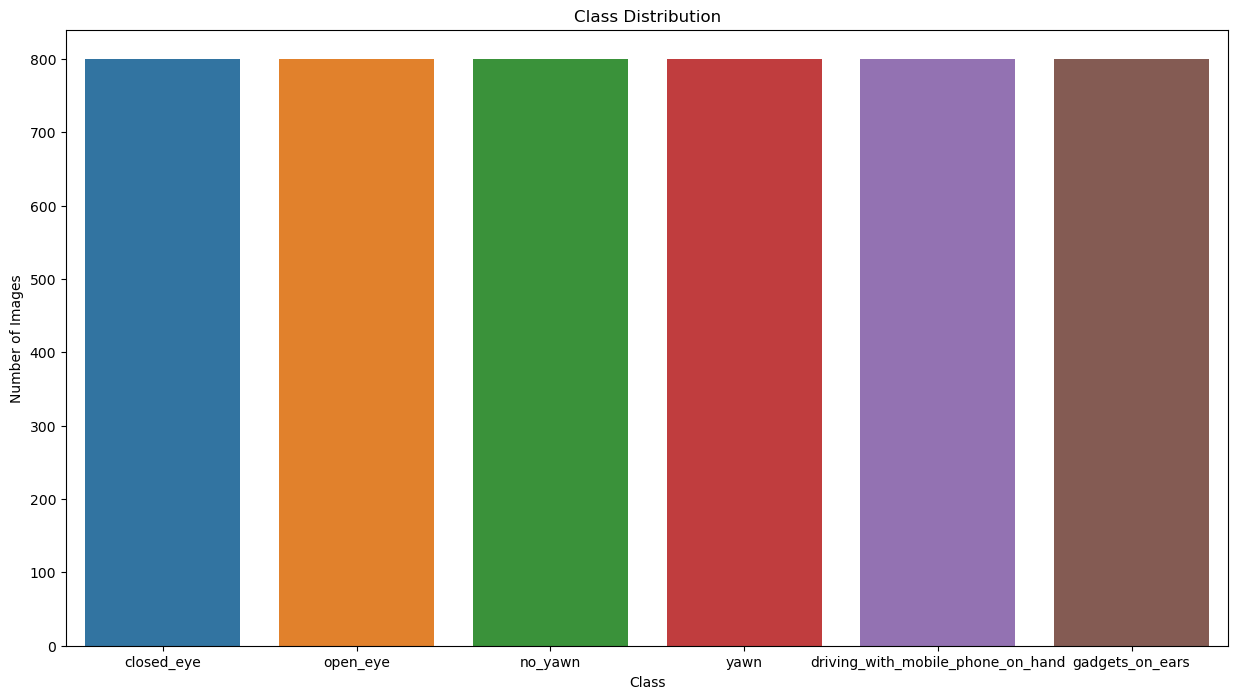

In [72]:

# Visualization 1: Bar Chart for Class Distribution
plt.figure(figsize=(15, 8))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


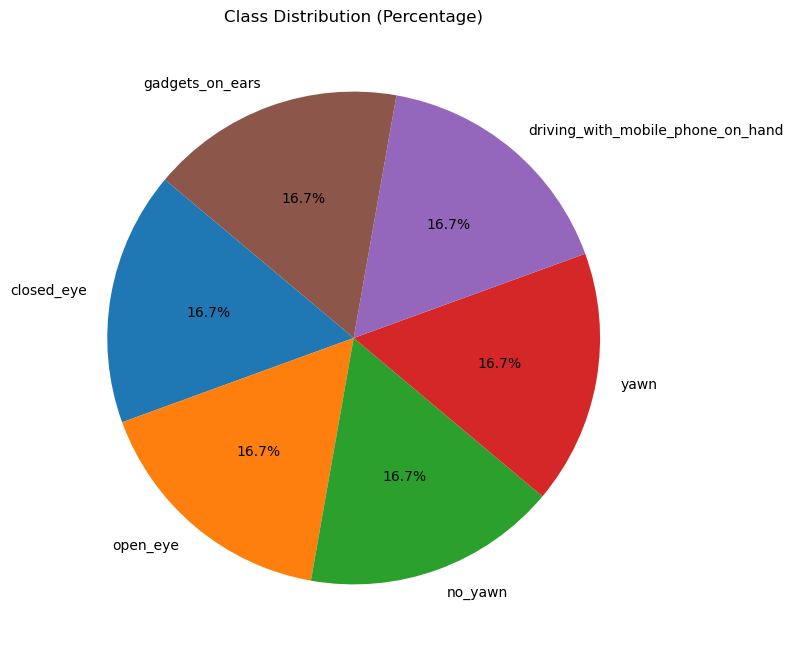

In [73]:

# Visualization 2: Pie Chart for Class Distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution (Percentage)")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


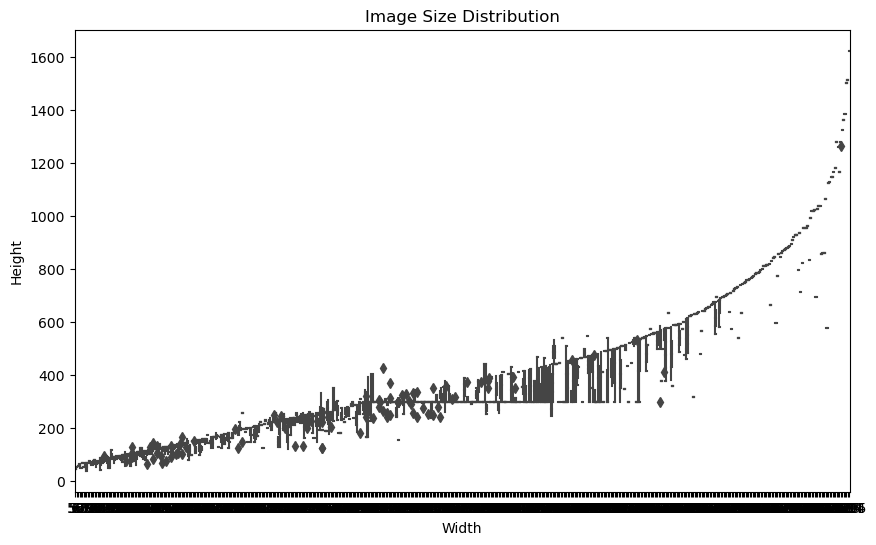

In [74]:
# Read information from the CSV file
csv_file_path = "image_info.csv"
image_info_df = pd.read_csv(csv_file_path)

# List to store image sizes
image_sizes = []

# Iterate through each row in the DataFrame
for index, row in image_info_df.iterrows():
    file_path = row['path']

    try:
        # Open image file using Pillow
        img = Image.open(file_path)

        # Get image size and append to the list
        image_sizes.append(img.size)

    except Exception as e:
        print(f"Error reading image file {file_path}: {str(e)}")

# Create a box plot for image size distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=[size[0] for size in image_sizes], y=[size[1] for size in image_sizes])
plt.title("Image Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

Image Shapes:
[(145, 145, 3), (200, 150, 3), (1384, 1385, 3), (1504, 1505, 3), (111, 103, 3)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


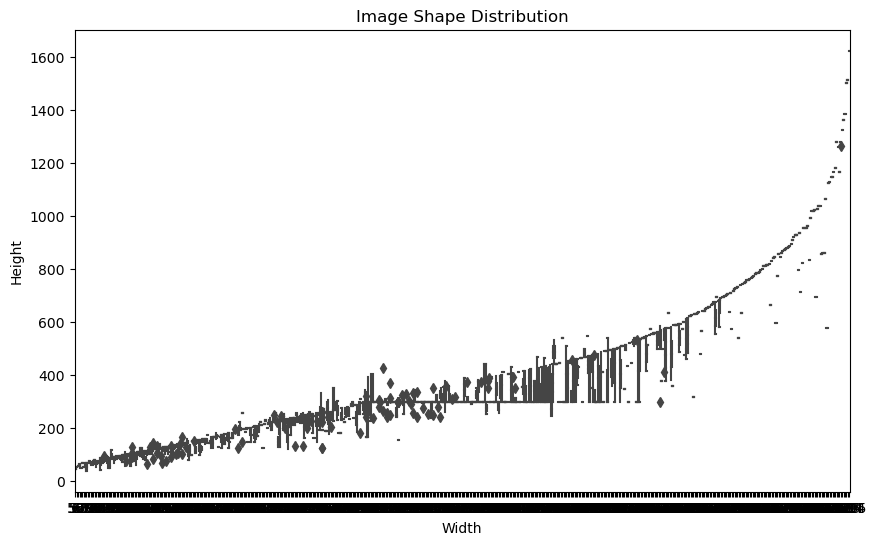

In [77]:
# Read information from the CSV file
csv_file_path = "image_info.csv"
image_info_df = pd.read_csv(csv_file_path)

# List to store image shapes
image_shapes = []

# Iterate through each row in the DataFrame
for index, row in image_info_df.iterrows():
    file_path = row['path']

    try:
        # Open image file using Pillow
        img = Image.open(file_path)

        # Get image shape (width, height, channels) and append to the list
        image_shapes.append(img.size + (len(img.getbands()),))

    except Exception as e:
        print(f"Error reading image file {file_path}: {str(e)}")

# Display the first few image shapes
print("Image Shapes:")
print(image_shapes[:5])

# Create a box plot for image shape distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=[shape[0] for shape in image_shapes], y=[shape[1] for shape in image_shapes])
plt.title("Image Shape Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [78]:
image_info_df.shape

(4800, 2)

In [86]:
labels_list = list(set(image_info_df['class_name'].values.tolist()))
labels_id = {label_name:id for id,label_name in enumerate(labels_list)}
print(labels_id)
image_info_df['class_name'].replace(labels_id,inplace=True)

{'yawn': 0, 'closed_eye': 1, 'gadgets_on_ears': 2, 'driving_with_mobile_phone_on_hand': 3, 'open_eye': 4, 'no_yawn': 5}


In [88]:

import pickle
pickle_directory = os.path.join(os.getcwd(), "pickle_files")

# Check if the directory exists, and if not, create it
if not os.path.exists(pickle_directory):
    os.makedirs(pickle_directory)

# Save the pickle file
with open(os.path.join(pickle_directory, "labels_list.pkl"), "wb") as handle:
    pickle.dump(labels_id, handle)

In [90]:
labels = to_categorical(image_info_df['class_name'])
print(labels.shape)

(4800, 6)


# Data Preparation
1. Converting the all the train and test images into image size of 64,64,3 
2. Standardizing the flattened image vector 

In [129]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(image_info_df.iloc[:,0],labels,test_size = 0.2,random_state=42)

In [130]:

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(128, 128))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [131]:

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(xtrain).astype('float32')/255 - 0.5


100%|█████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:24<00:00, 155.81it/s]


In [144]:
valid_tensors = paths_to_tensor(xtest).astype('float32')/255 - 0.5

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:06<00:00, 155.34it/s]


# MODEL ARCHITECTURE

## Approach Used
1. Removing the top layer of VGG16 model
2. Using the n-1 layers of VGG16 to predict the last layer of it using the flattened image vector 
3. The last layer thus achieved is a dense feature representation for a particular image
4. Passing this layer feature through a GlobalAveragePooling Layer and a further dense softmax layer for each of 10 classes

## Benefits

1. Making CNN architecture from scratch involves in training of all the deep layers which results in slow training
2. Instead of a large sparse image vector a dense feature representation used here requires less memory while training

CNN

In [159]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3), kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax', kernel_initializer='glorot_normal'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 64)      832       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 256)       131328    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 256)      

In [160]:
save_path = os.path.join(os.getcwd(), "model", "CNN")
png_file_path = os.path.join(save_path, "model_smart_driver_gaurd_CNN.png")

# Create the directory if it does not exist
os.makedirs(save_path, exist_ok=True)

# Plot and save the model
plot_model(model, to_file=png_file_path, show_shapes=True, show_layer_names=True)

print(f"Model PNG file saved to: {png_file_path}")

Model PNG file saved to: C:\Users\yashu\smart_driver_guard\model\CNN\model_smart_driver_gaurd_CNN.png


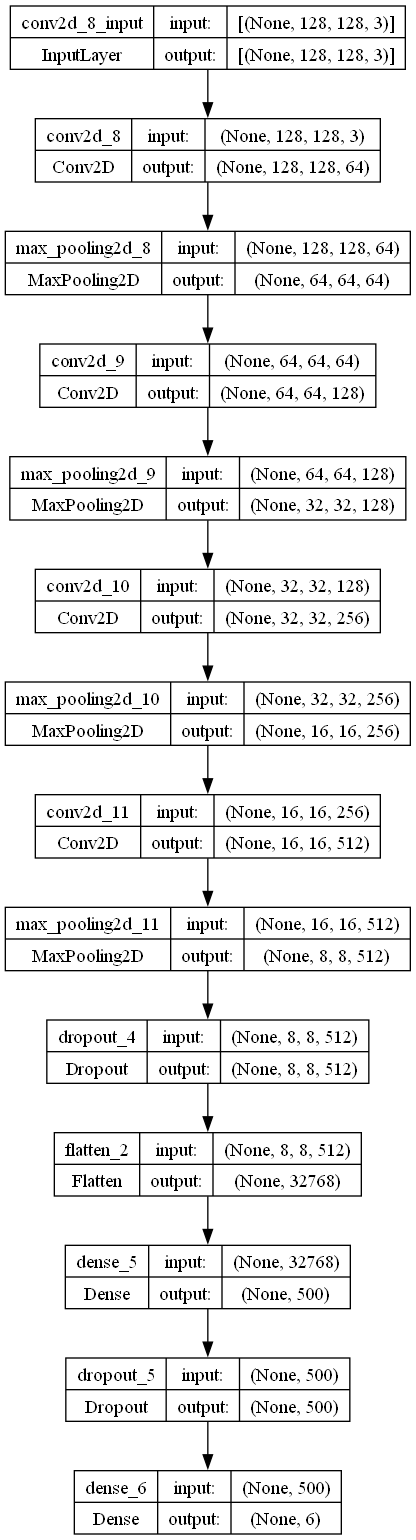

In [161]:
plot_model(model,to_file=os.path.join(os.getcwd(),"model","CNN", "model_smart_driver_gaurd_vgg16.png"),show_shapes=True,show_layer_names=True)

In [162]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
# Define the path to save the models
MODEL_PATH = "C:\\Users\\yashu\\smart_driver_guard\\app\\models"
# Define the filepath for the best optimized model
best_model_filepath = os.path.join(MODEL_PATH, "cnn_classification_model.h5")

# Define the filepath for the Tensorflow Lite model
tflite_model_filepath = os.path.join(MODEL_PATH, "cnn_classification_model.tflite")

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint(best_model_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1)
callbacks_list = [checkpoint]

# Train the model
model_history = model.fit(train_tensors, ytrain, validation_data=(valid_tensors, ytest), epochs=25, batch_size=40, shuffle=True, callbacks=callbacks_list)

# Load the best model saved during training
best_model = load_model(best_model_filepath)

# Save the best model
best_model.save(os.path.join(MODEL_PATH, "cnn_classification_model.h5"))

# Convert the best model to Tensorflow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the Tensorflow Lite model
with open(tflite_model_filepath, "wb") as f:
    f.write(tflite_model)

print("Models saved successfully.")


Epoch 1/25
96/96 [==============================] - ETA: 0s - loss: 0.9053 - accuracy: 0.6010
Epoch 1: val_accuracy improved from -inf to 0.75313, saving model to C:\Users\yashu\smart_driver_guard\app\models\cnn_classification_model.h5


C:\Users\yashu\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 138s 1s/step - loss: 0.9053 - accuracy: 0.6010 - val_loss: 0.5070 - val_accuracy: 0.7531
Epoch 2/25
96/96 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.7747
Epoch 2: val_accuracy improved from 0.75313 to 0.85208, saving model to C:\Users\yashu\smart_driver_guard\app\models\cnn_classification_model.h5
96/96 [==============================] - 134s 1s/step - loss: 0.5158 - accuracy: 0.7747 - val_loss: 0.3352 - val_accuracy: 0.8521
Epoch 3/25
96/96 [==============================] - ETA: 0s - loss: 0.3969 - accuracy: 0.8299
Epoch 3: val_accuracy improved from 0.85208 to 0.88750, saving model to C:\Users\yashu\smart_driver_guard\app\models\cnn_classification_model.h5
96/96 [==============================] - 135s 1s/step - loss: 0.3969 - accuracy: 0.8299 - val_loss: 0.2613 - val_accuracy: 0.8875
Epoch 4/25
96/96 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8646
Epoch 4: val_accuracy did not improve 

NameError: name 'load_model' is not defined

In [168]:

from tensorflow.keras.models import load_model
import tensorflow as tf
# Load the best model saved during training
best_model = load_model(best_model_filepath)

# Save the best model
best_model.save(os.path.join(MODEL_PATH, "cnn_classification_model.h5"))

# Convert the best model to Tensorflow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the Tensorflow Lite model
with open(tflite_model_filepath, "wb") as f:
    f.write(tflite_model)

print("Models saved successfully.")

INFO:tensorflow:Assets written to: C:\Users\yashu\AppData\Local\Temp\tmpdxiral1c\assets


INFO:tensorflow:Assets written to: C:\Users\yashu\AppData\Local\Temp\tmpdxiral1c\assets


Models saved successfully.


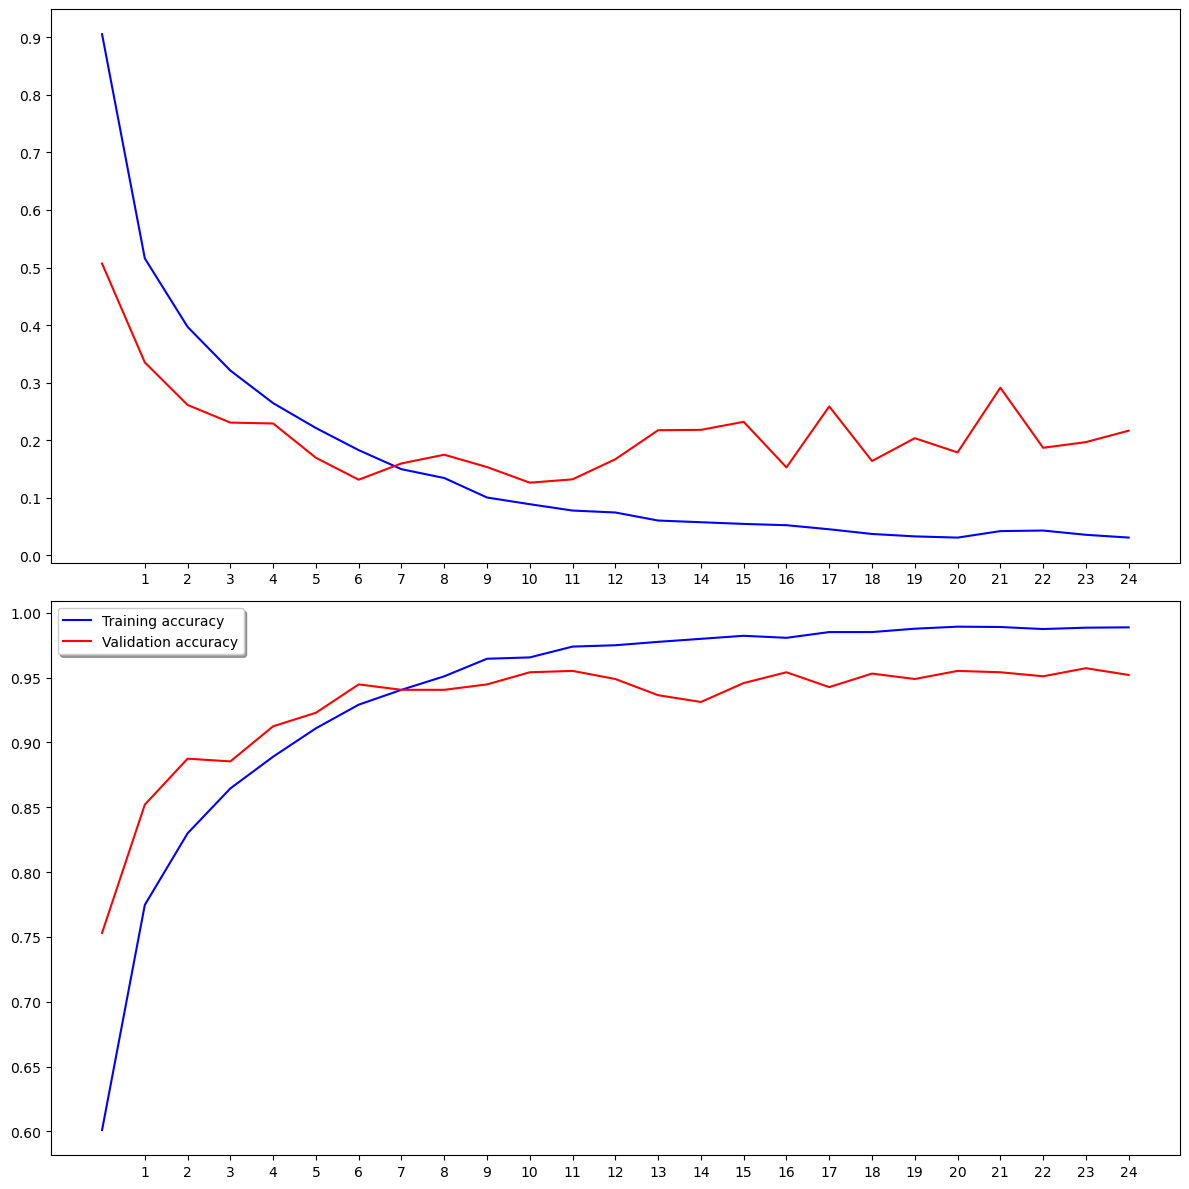

In [205]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)

plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(MODEL_PATH, "training_plot.png"))
plt.show()

30/30 [==============================] - 6s 195ms/step


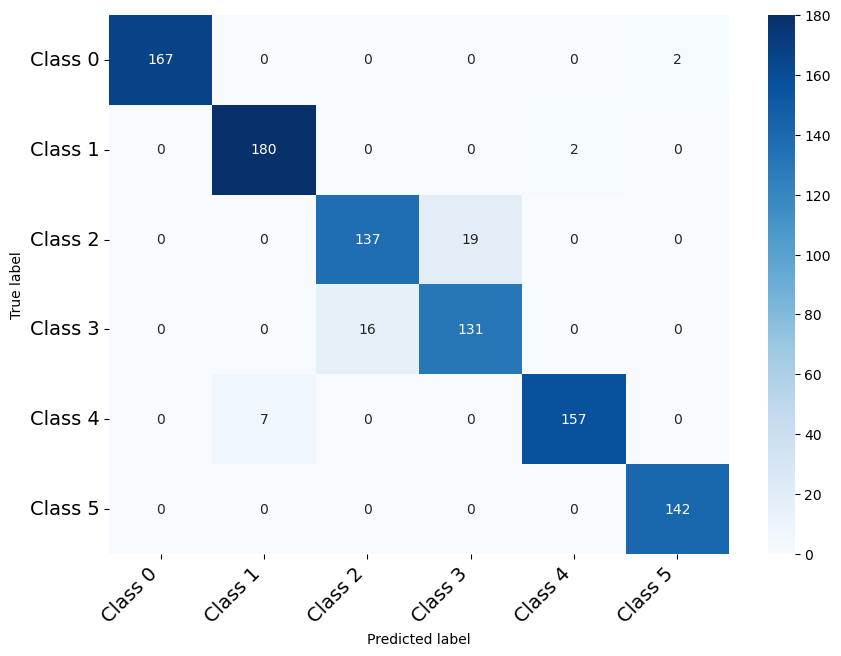

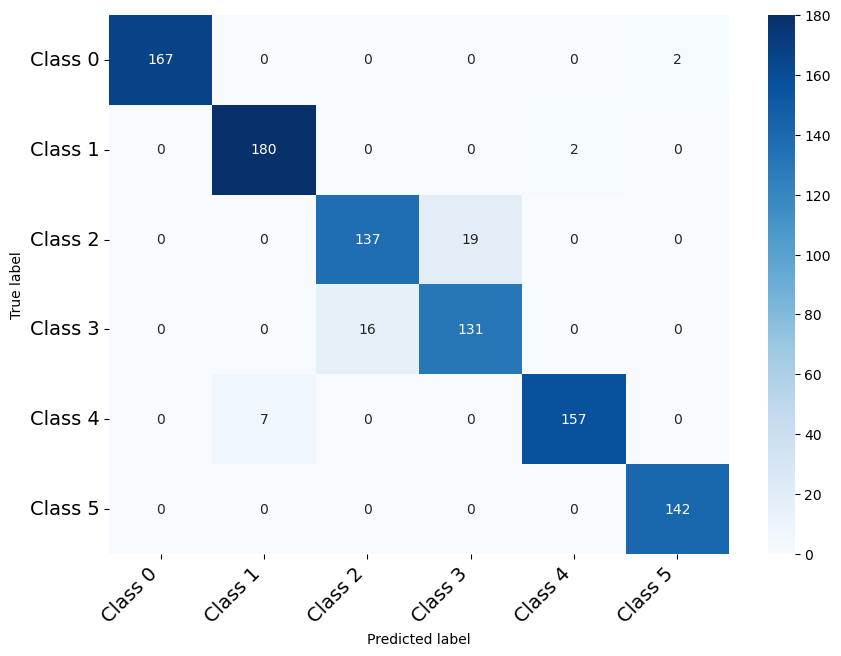

In [185]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig, ax = plt.subplots(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Display the plot in the notebook
    plt.show()
    
    return fig

# Assuming confusion_matrix is calculated using sklearn's confusion_matrix
# Make predictions on the validation set
y_pred_probs = model.predict(valid_tensors)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(np.argmax(ytest_one_hot, axis=1), y_pred)

# Display confusion matrix in the notebook
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
plot_confusion_matrix(conf_matrix, class_names)


30/30 [==============================] - 6s 189ms/step


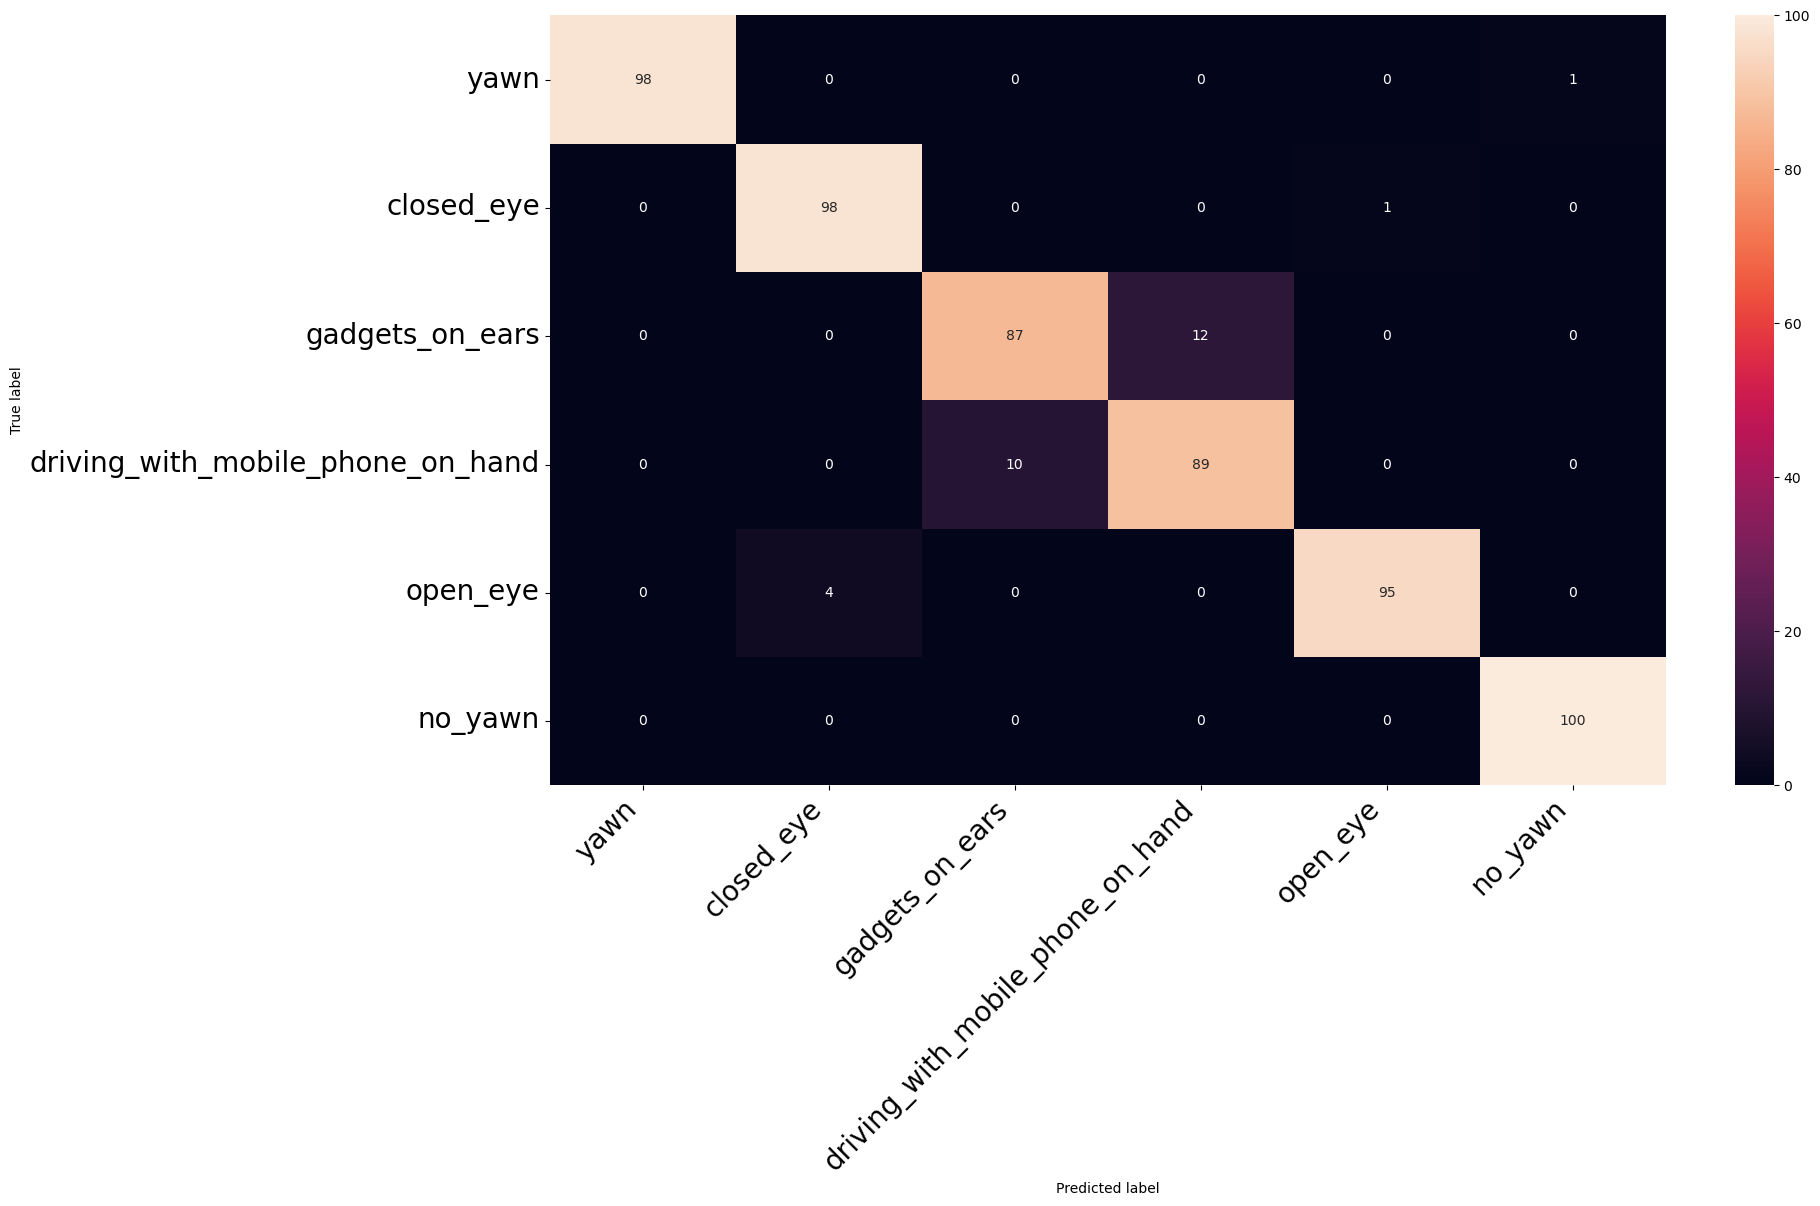

In [187]:
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels.argmax(axis=1),predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

class_names = list()
for name,idx in labels_id.items():
    class_names.append(name)
# print(class_names)
ypred = model.predict(valid_tensors)
print_heatmap(ytest,ypred,class_names)

In [188]:
ypred_class = np.argmax(ypred,axis=1)
# print(ypred_class[:10])
ytest = np.argmax(ytest,axis=1)

In [189]:
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.952083
Precision: 0.952311
Recall: 0.952083
F1 score: 0.952083


In [190]:
from sklearn.metrics import classification_report

# Assuming ytest_one_hot is the one-hot encoded true labels
# and y_pred_probs is the predicted probabilities from your model

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate a classification report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
classification_rep = classification_report(np.argmax(ytest_one_hot, axis=1), y_pred, target_names=target_names)

# Print and display the classification report
print(classification_rep)


              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99       169
     Class 1       0.96      0.99      0.98       182
     Class 2       0.90      0.88      0.89       156
     Class 3       0.87      0.89      0.88       147
     Class 4       0.99      0.96      0.97       164
     Class 5       0.99      1.00      0.99       142

    accuracy                           0.95       960
   macro avg       0.95      0.95      0.95       960
weighted avg       0.95      0.95      0.95       960



In [198]:
# Model size
model_size = os.path.getsize(os.path.join(MODEL_PATH, "cnn_classification_model.h5"))
print(f"Model Size: {model_size} bytes")


Model Size: 136667696 bytes


30/30 [==============================] - 6s 188ms/step


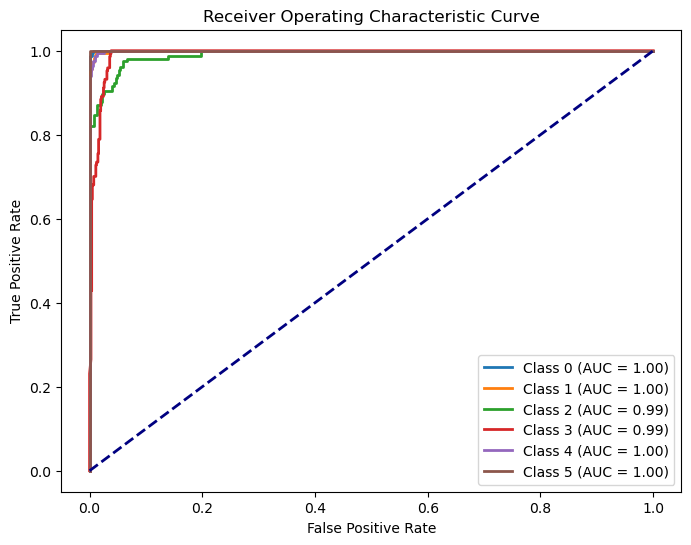

In [204]:
from sklearn.metrics import roc_curve, auc

# ROC and AUC curves
y_pred_probs = model.predict(valid_tensors)

# If it's a multi-class classification problem, convert to one-hot encoding
if len(y_pred_probs.shape) > 1 and y_pred_probs.shape[1] > 1:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(ytest_one_hot.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(ytest_one_hot[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
else:
    fpr, tpr, _ = roc_curve(ytest_one_hot.ravel(), y_pred_probs.ravel())
    roc_auc = auc(fpr, tpr)
    
# Plot ROC curve
plt.figure(figsize=(8, 6))

# If it's a multi-class problem, plot ROC curves for each class
if isinstance(roc_auc, dict):
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
else:
    # For binary classification or micro/macro averaged curves
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
    